In [159]:
# import the MongoClient class
from pymongo import MongoClient
import pymongo

# import the Pandas library
import pandas as pd

# import the NumPy library as an alias
import numpy as np
import creds


# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

# turn off warnings
import warnings
warnings.filterwarnings('ignore')


#
import datetime
import re

In [272]:
currtime=datetime.datetime.now()

Taken from
https://alysivji.github.io/importing-mongo-documents-into-pandas-dataframes.html

In [273]:
client = MongoClient("mongodb://storage:27017/", username='judyread', password=creds.judyro,authSource='admin', authMechanism='SCRAM-SHA-1')

In [274]:
db = client["judy"]

In [275]:
col = db.exps

In [276]:
response=col.find().sort('$natural', pymongo.DESCENDING).limit(500)

In [277]:
# test to see if response is populated
#list(response)

In [278]:
client.close()

In [72]:
#for r in response:
#    print(r)

In [279]:
df =  pd.DataFrame(list(response))

In [280]:
df.head()

,_id,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,...,maxhps,maxmana,maxmoves,name,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time
0,5d4eb1c1855a2849a93254f0,1,4000000,1,79,40,52,45,183,212889,...,212889,10075,543,Ida,1,6105,1,1,1,1565438045
1,5d4eb1c1855a2849a93254ef,1,0,1,40,40,52,45,201,155361,...,155361,10048,670,Clem,1,6123,1,1,1,1565438049
2,5d4eb1c1855a2849a93254ee,1,45,1,1,169,176,40,40,172432,...,172432,10009,565,Quinton,1,6105,1,1,1,1565438045
3,5d4eb1c1855a2849a93254ed,1,0,1,40,40,40,45,213,221582,...,221582,10395,654,Bert,1,6105,1,1,1,1565438049
4,5d4eb1c1855a2849a93254ec,1,0,1,60,40,45,44,117,111038,...,111038,10024,652,Lee,1,6109,1,1,1,1565438049


In [83]:
df['name'][0]

'Ida'

In [85]:
df.loc[df['name'] == 'Ida']

,_id,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,...,maxhps,maxmana,maxmoves,name,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time
0,5d4eb1c1855a2849a93254f0,1,4000000,1,79,40,52,45,183,212889,...,212889,10075,543,Ida,1,6105,1,1,1,1565438045
45,5d4eae3d855a28480d4359b1,1,4000000,1,79,40,52,45,183,212889,...,212889,10075,543,Ida,1,6105,1,1,1,1565437445
46,5d4eae3d855a28480d4359b0,1,4000000,1,79,40,52,45,183,212889,...,212889,10075,543,Ida,1,6105,1,1,1,1565436845


In [90]:
type(df.time[0])

str

In [330]:
df['dateStamp'] = pd.to_datetime(df['time'], unit='s')

In [94]:
type(df.dateStamp[0])

pandas._libs.tslibs.timestamps.Timestamp

_id
armor_on
bank
clarity_on
current_con
current_dex
current_int
current_str
current_wis
currenthps
currentmana
experience
gold
harm_multiplier
infravision_on
kick_multiplier
kick_timer
kickbonus
mainmob
maxhps
maxmana
maxmoves
name
regeneration_on
room
sanctuary_on
senselife_on
strength_on
time
dateStamp


In [101]:
mystrs=[]
myints=[]


In [100]:
type(df['currenthps'][0])

str

In [103]:
df.head(2)

,_id,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,...,maxmana,maxmoves,name,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time,dateStamp
0,5d4eb1c1855a2849a93254f0,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565438045,2019-08-10 11:54:05
1,5d4eb1c1855a2849a93254ef,1,0,1,40,40,52,45,201,155361,...,10048,670,Clem,1,6123,1,1,1,1565438049,2019-08-10 11:54:09


#### how to fix the NaNs. 

In [283]:
# how many NaNs in each column?
df.isnull().sum()

_id                 0
armor_on            0
bank                0
clarity_on          0
current_con         0
current_dex         0
current_int         0
current_str         0
current_wis         0
currenthps          0
currentmana         0
experience          0
gold                0
harm_multiplier    56
infravision_on     10
kick_multiplier    10
kick_timer         10
kickbonus          10
mainmob             0
maxhps              0
maxmana             0
maxmoves            0
name                0
regeneration_on     0
room                0
sanctuary_on        0
senselife_on       10
strength_on        10
time                0
dateStamp           0
dtype: int64

In [284]:
# find column dtype
df.experience.dtype


dtype('O')

In [341]:
# returns index and number - need to strip off the index
df['current_str'].mode()

0    45
dtype: int64

In [300]:
# to strip off the leading index of the .mode() return.
df['current_str'].mode()[0]

'45'

In [293]:
# count total NaNs in df, not a list of nans per column
df.isnull().sum().sum()

60

In [304]:
df['infravision_on'].isnull().sum()

10

In [291]:
# Check the rows that aren't the same as the modal value
df[df['harm_multiplier'] != '15']['harm_multiplier']

Series([], Name: harm_multiplier, dtype: object)

### Cleaning Up NaNs

replacing all NaNs with the mode value of the column

In [305]:
# clean up all NaNs by replacing them with the modal Series value.
# This is fine here because most of the missing data are not very unique - 
# This would be a little better if we did it by player id
#
# must use df[c].isnull().values.any() to check the individual values
for c in df.columns:
    if df[c].isnull().values.any():
        df[c].fillna(df[c].mode()[0], inplace=True)

In [307]:
df.isnull().sum()

_id                0
armor_on           0
bank               0
clarity_on         0
current_con        0
current_dex        0
current_int        0
current_str        0
current_wis        0
currenthps         0
currentmana        0
experience         0
gold               0
harm_multiplier    0
infravision_on     0
kick_multiplier    0
kick_timer         0
kickbonus          0
mainmob            0
maxhps             0
maxmana            0
maxmoves           0
name               0
regeneration_on    0
room               0
sanctuary_on       0
senselife_on       0
strength_on        0
time               0
dateStamp          0
dtype: int64

### Transform Objects to ints and strings

In [308]:
# transform the Objects to ints and strings. need to add booleans
# all entries are Objects - change numbers to ints and strings to strings
for c in df.columns:
    print(c)
    foo = str(df[c][0])
    if foo.isnumeric():
        df[c] = df[c].astype(int)
    elif foo.isalpha():
        df[c] = df[c].astype(str)
    else:
        print(type(df[c][0]))

_id
<class 'bson.objectid.ObjectId'>
armor_on
bank
clarity_on
current_con
current_dex
current_int
current_str
current_wis
currenthps
currentmana
experience
gold
harm_multiplier
infravision_on
kick_multiplier
kick_timer
kickbonus
mainmob
<class 'str'>
maxhps
maxmana
maxmoves
name
regeneration_on
room
sanctuary_on
senselife_on
strength_on
time
dateStamp
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [309]:
df.dtypes

_id                        object
armor_on                    int64
bank                        int64
clarity_on                  int64
current_con                 int64
current_dex                 int64
current_int                 int64
current_str                 int64
current_wis                 int64
currenthps                  int64
currentmana                 int64
experience                  int64
gold                        int64
harm_multiplier             int64
infravision_on              int64
kick_multiplier             int64
kick_timer                  int64
kickbonus                   int64
mainmob                    object
maxhps                      int64
maxmana                     int64
maxmoves                    int64
name                       object
regeneration_on             int64
room                        int64
sanctuary_on                int64
senselife_on                int64
strength_on                 int64
time                        int64
dateStamp     

In [342]:
# get data for just one player
df.loc[df['name'] == 'Ida']['currenthps']

0      212889
45     212889
46     212889
134    212889
180    212889
181    212889
269    212889
315    212889
316    212889
404    212889
450    212889
451    212889
Name: currenthps, dtype: int64

In [310]:
# Get all the rows where name is 'Ida'
df.loc[df['name'] == 'Ida']

,_id,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,...,maxmana,maxmoves,name,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time,dateStamp
0,5d4eb1c1855a2849a93254f0,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565438045,2019-08-10 11:54:05
45,5d4eae3d855a28480d4359b1,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565437445,2019-08-10 11:44:05
46,5d4eae3d855a28480d4359b0,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565436845,2019-08-10 11:34:05
134,5d4eaab9855a2846842ed089,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565436245,2019-08-10 11:24:05
180,5d4ea735855a2846118f9c25,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565435645,2019-08-10 11:14:05
181,5d4ea735855a2846118f9c24,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565435045,2019-08-10 11:04:05
269,5d4ea3b1855a2844ae636a41,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565434445,2019-08-10 10:54:05
315,5d4ea02d855a28443a3c2664,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565433845,2019-08-10 10:44:05
316,5d4ea02d855a28443a3c2663,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565433245,2019-08-10 10:34:05
404,5d4e9ca9855a2842df225877,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565432645,2019-08-10 10:24:05


In [311]:
# how many samples does each player have?
df['name'].value_counts().head(10)

Squeaky    12
Sandra     12
Lee        12
Gypsy      12
Steve      12
Quinton    12
Mary       12
Titas      12
Cappy      12
Una        12
Name: name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

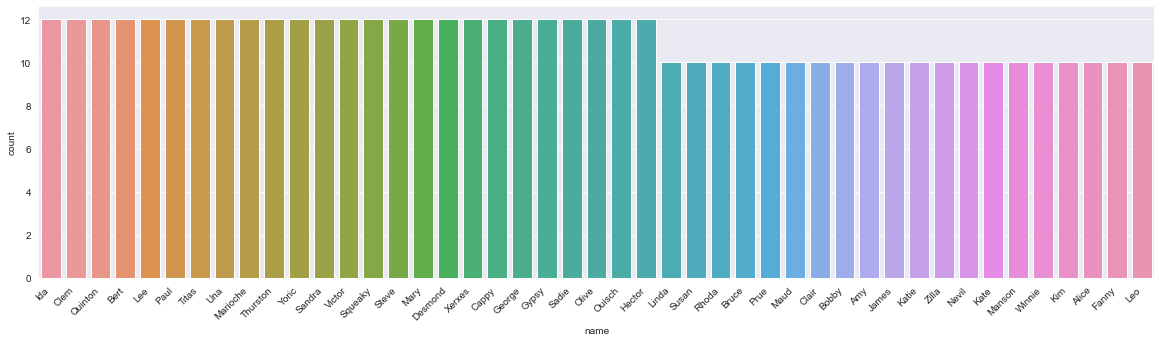

In [356]:
# how many samples does each player have, the graph
plt.figure(figsize=(20,5))
sns.countplot(df['name'])
plt.xticks(rotation=45, ha='right')

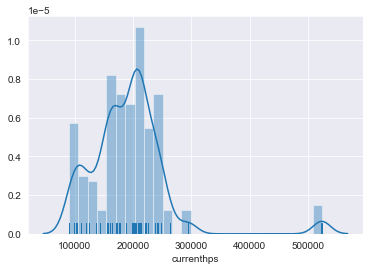

In [321]:
#What's the distribution of hit points for this sample?
sns.distplot(df['currenthps'], rug=True)

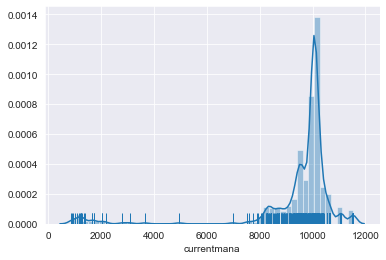

In [322]:
# show current mana
sns.distplot(df['currentmana'], rug=True)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text major ticklabel objects>)

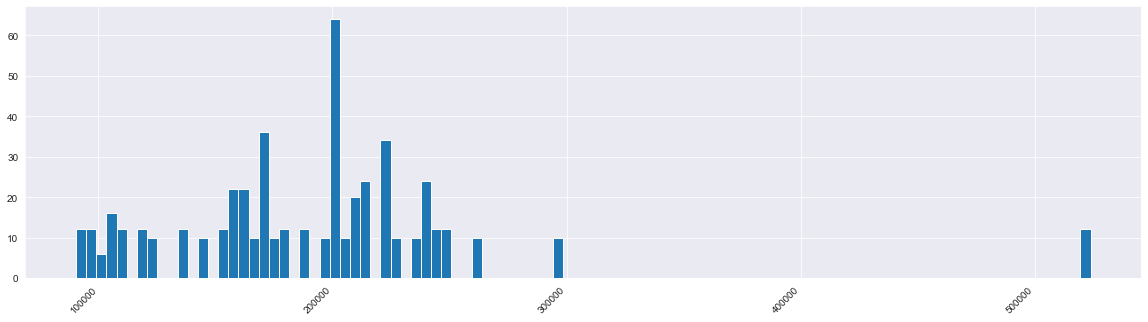

In [358]:
plt.figure(figsize=(20,5))
df['maxhps'].hist(bins=100)
plt.xticks(rotation=45, ha='right')

In [345]:
df['maxhps'].max()

523965

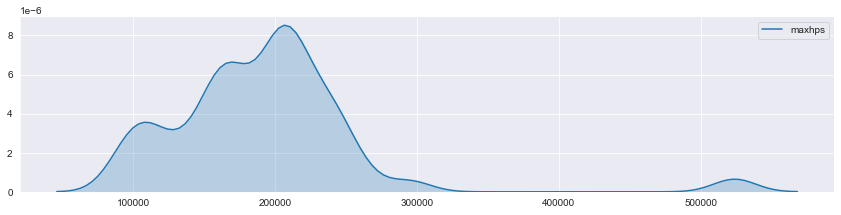

In [359]:
# no overlay
sns.FacetGrid(df, hue='name',aspect=4)
sns.kdeplot(df['maxhps'],shade=True)
burliest = df['maxhps'].max() # what should the upper ldimit of the x axis be?
fig.set(xlim=(0,burliest)) # set the xlimits from non-negative numbers to oldest
fig.add_legend() # add a legend

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

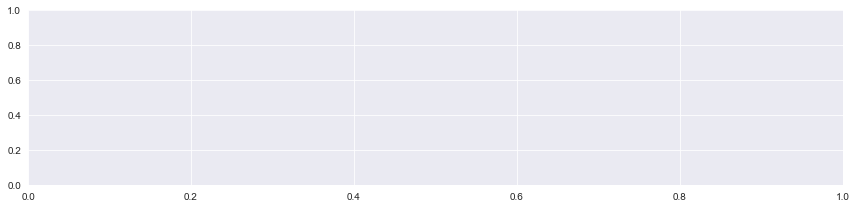

In [343]:
# Visualizing Age with FacetGrid and kdeplot using multiple subplots
fig = sns.FacetGrid(df, hue='name',aspect=4)
fig.map(sns.kdeplot,'maxhps',shade=True) # add the kdeplot
burliest = df['maxhps'].max() # what should the upper limit of the x axis be?
fig.set(xlim=(0,burliest)) # set the xlimits from non-negative numbers to oldest
fig.add_legend() # add a legend

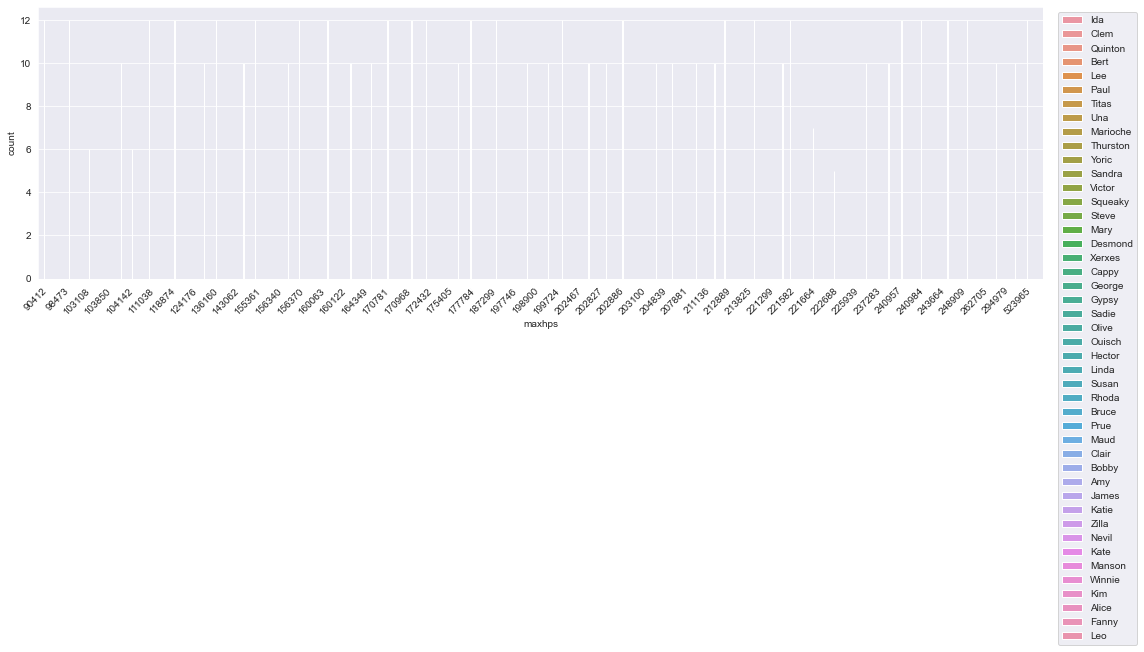

In [463]:
plt.figure(figsize=(18,5))
sns.countplot('maxhps',data=df,hue='name')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right',bbox_to_anchor=(1.099, 1))

(array([  0.,  50., 100.]), <a list of 0 Text major ticklabel objects>)

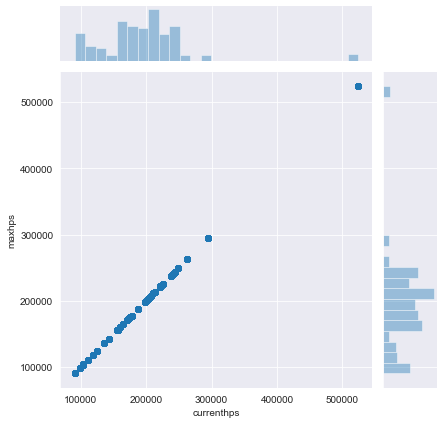

In [339]:
sns.jointplot('currenthps','maxhps',data=df)
plt.xticks(rotation=45, ha='right')

(array([  0., 100., 200.]), <a list of 0 Text major ticklabel objects>)

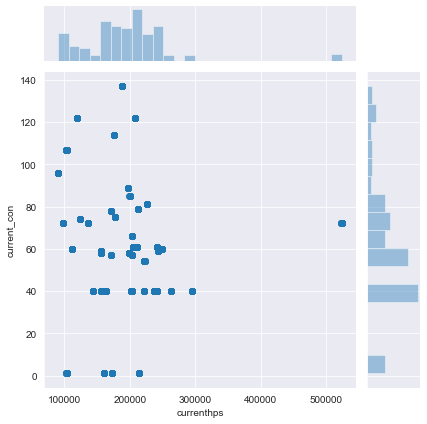

In [467]:
sns.jointplot('currenthps','current_con',data=df)
plt.xticks(rotation=45, ha='right')

In [338]:
df['currenthps'].mean()

192696.326

In [337]:
df['maxhps'].mean()

192714.876

In [182]:
df.columns

Index(['_id', 'armor_on', 'bank', 'clarity_on', 'current_con', 'current_dex',
       'current_int', 'current_str', 'current_wis', 'currenthps',
       'currentmana', 'experience', 'gold', 'harm_multiplier',
       'infravision_on', 'kick_multiplier', 'kick_timer', 'kickbonus',
       'mainmob', 'maxhps', 'maxmana', 'maxmoves', 'name', 'regeneration_on',
       'room', 'sanctuary_on', 'senselife_on', 'strength_on', 'time',
       'dateStamp'],
      dtype='object')

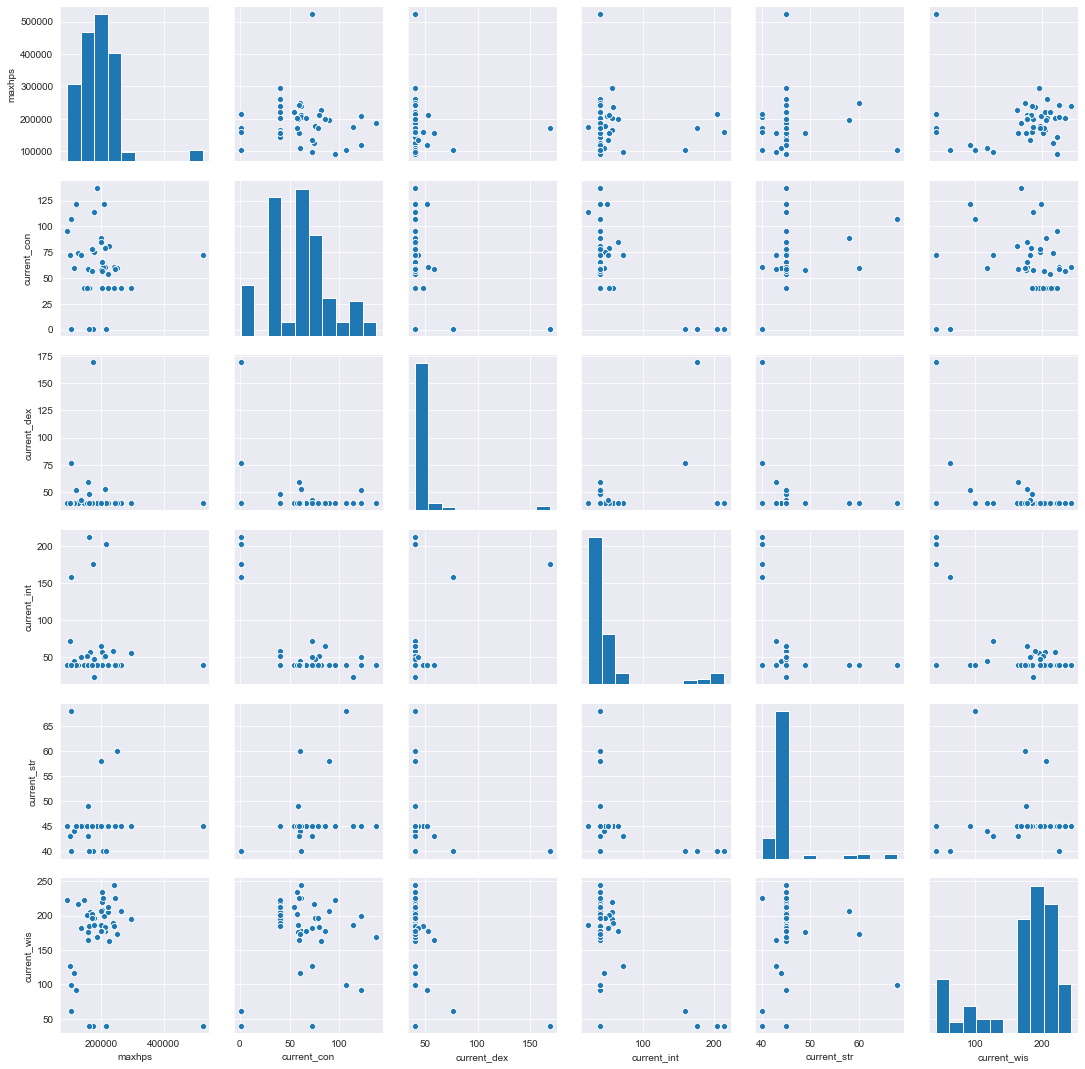

In [468]:
sns.pairplot(df[['maxhps','current_con','current_dex','current_int','current_str','current_wis']])

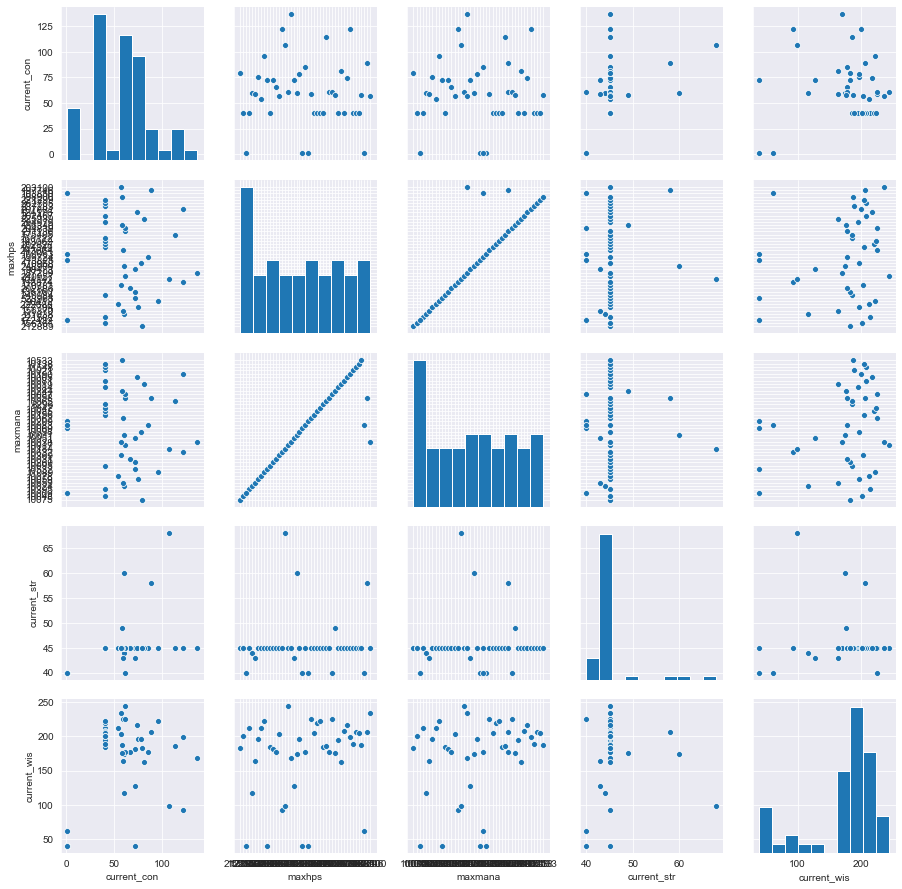

In [184]:
sns.pairplot(df[['current_con','maxhps','maxmana','current_str','current_wis']])

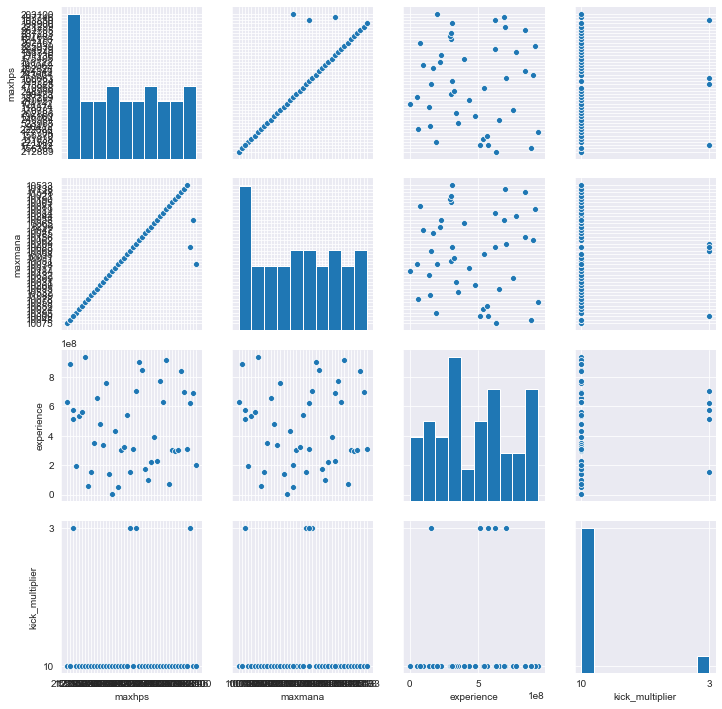

In [188]:
sns.pairplot(df[['maxhps','maxmana','experience','kick_multiplier']].dropna())

In [194]:
df.dtypes

_id                        object
armor_on                    int64
bank                        int64
clarity_on                  int64
current_con                 int64
current_dex                 int64
current_int                 int64
current_str                 int64
current_wis                 int64
currenthps                  int64
currentmana                 int64
experience                  int64
gold                        int64
harm_multiplier            object
infravision_on             object
kick_multiplier            object
kick_timer                 object
kickbonus                  object
mainmob                    object
maxhps                     object
maxmana                    object
maxmoves                   object
name                       object
regeneration_on            object
room                       object
sanctuary_on               object
senselife_on               object
strength_on                object
time                       object
dateStamp     

In [318]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

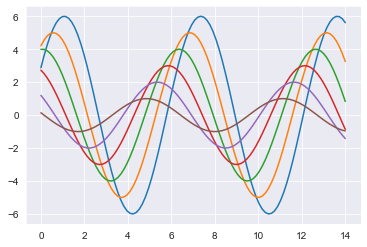

In [319]:
sinplot()

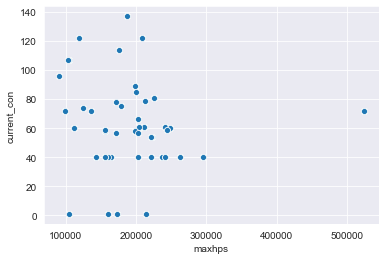

In [325]:
sns.scatterplot(df['maxhps'],df['current_con'])

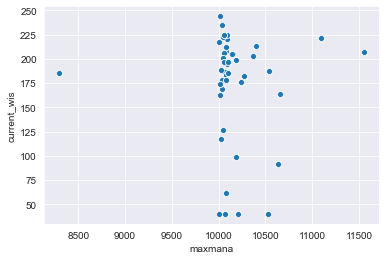

In [326]:
sns.scatterplot(df['maxmana'],df['current_wis'])

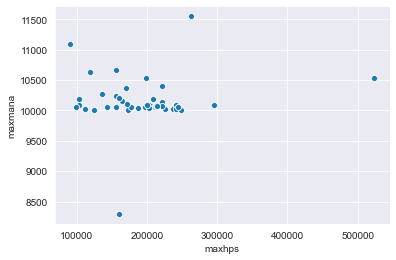

In [327]:
sns.scatterplot(df['maxhps'],df['maxmana'])

In [ ]:
']

In [329]:
# what stats correlate?
df.corr()

,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,currentmana,...,kickbonus,maxhps,maxmana,maxmoves,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time
armor_on,1.000000,-0.038163,1.000000,0.000111,-0.035438,-0.057687,-0.160866,0.135611,0.024839,0.048459,...,-0.048673,0.024798,-0.026767,-0.038281,1.000000,-0.599379,1.000000,NaN,NaN,0.026844
bank,-0.038163,1.000000,-0.038163,0.047689,-0.017661,-0.112167,-0.053373,-0.299589,0.640387,-0.566013,...,0.046212,0.640601,0.240196,0.268487,-0.038163,0.058015,-0.038163,NaN,NaN,-0.027778
clarity_on,1.000000,-0.038163,1.000000,0.000111,-0.035438,-0.057687,-0.160866,0.135611,0.024839,0.048459,...,-0.048673,0.024798,-0.026767,-0.038281,1.000000,-0.599379,1.000000,NaN,NaN,0.026844
current_con,0.000111,0.047689,0.000111,1.000000,-0.342114,-0.622368,0.388030,0.241273,-0.088164,-0.043509,...,-0.607542,-0.088386,0.140542,-0.069168,0.000111,0.194809,0.000111,NaN,NaN,-0.006395
current_dex,-0.035438,-0.017661,-0.035438,-0.342114,1.000000,0.477637,-0.227271,-0.443082,-0.119859,0.058398,...,0.562103,-0.119670,-0.059780,0.029160,-0.035438,-0.143572,-0.035438,NaN,NaN,-0.021366
current_int,-0.057687,-0.112167,-0.057687,-0.622368,0.477637,1.000000,-0.375361,-0.710623,-0.125782,0.093603,...,0.957001,-0.125501,-0.064570,-0.010303,-0.057687,-0.206378,-0.057687,NaN,NaN,-0.036219
current_str,-0.160866,-0.053373,-0.160866,0.388030,-0.227271,-0.375361,1.000000,0.096641,-0.031171,-0.026715,...,-0.359782,-0.031331,-0.019481,-0.041599,-0.160866,0.180177,-0.160866,NaN,NaN,0.000450
current_wis,0.135611,-0.299589,0.135611,0.241273,-0.443082,-0.710623,0.096641,1.000000,-0.043738,0.359939,...,-0.769044,-0.044103,-0.021909,-0.220950,0.135611,0.131068,0.135611,NaN,NaN,0.057771
currenthps,0.024839,0.640387,0.024839,-0.088164,-0.119859,-0.125782,-0.031171,-0.043738,1.000000,-0.417307,...,-0.013734,0.999999,0.086106,-0.153753,0.024839,0.127955,0.024839,NaN,NaN,0.010725
currentmana,0.048459,-0.566013,0.048459,-0.043509,0.058398,0.093603,-0.026715,0.359939,-0.417307,1.000000,...,-0.012145,-0.417528,0.150124,-0.261343,0.048459,-0.052692,0.048459,NaN,NaN,0.023270


In [331]:
df['dateStamp'].head()

0   2019-08-10 11:54:05
1   2019-08-10 11:54:09
2   2019-08-10 11:54:05
3   2019-08-10 11:54:09
4   2019-08-10 11:54:09
Name: dateStamp, dtype: datetime64[ns]

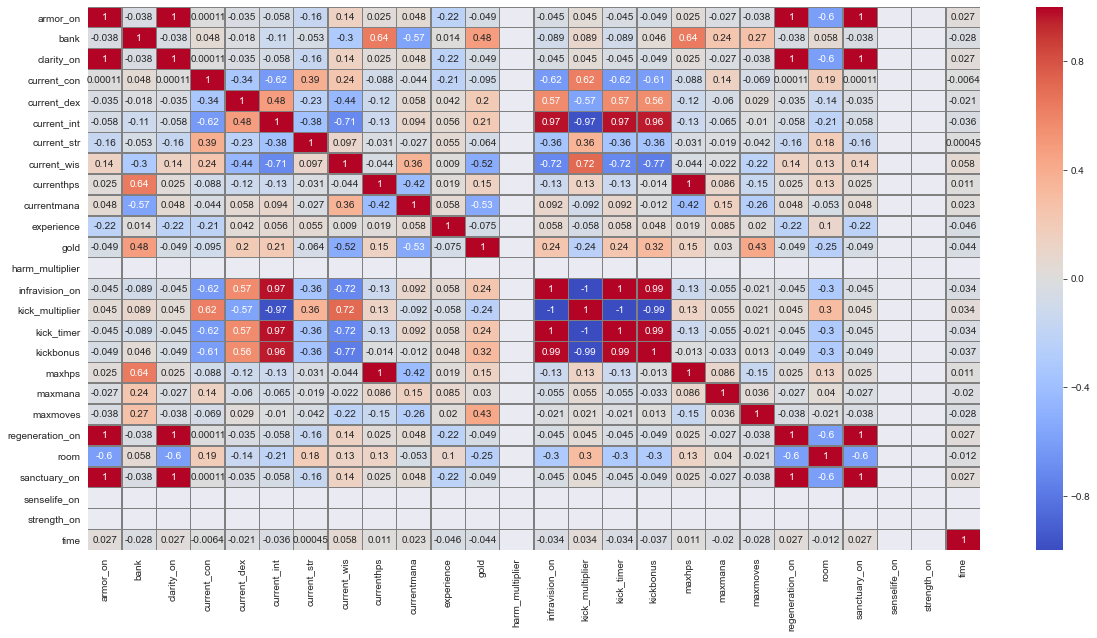

In [336]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True, linewidths=.5, linecolor='grey')


In [362]:
players = ['Leo', 'Fanny', 'Alice', 'Kim', 'Winnie', 'Manson', 'Kate', 'Nevil', 'Zilla', 'Katie', 'James', 'Amy', 'Bobby', 'Clair', 'Maud', 'Prue', 'Bruce', 'Rhoda', 'Larry', 'Susan', 'Linda', 'Hector', 'Ouisch', 'Kitty', 'Olive', 'Sadie', 'Gypsy', 'George', 'Cappy', 'Xerxes', 'Desmond', 'Mary', 'Basil', 'Steve', 'Squeaky', 'Victor', 'Sandra', 'Yoric', 'Thurston', 'Ernest', 'Marioche', 'Una', 'Titas', 'Paul', 'Lee', 'Bert', 'Quinton', 'Clem', 'Ida']

In [366]:
df['name'].unique()

array(['Ida', 'Clem', 'Quinton', 'Bert', 'Lee', 'Paul', 'Titas', 'Una',
       'Marioche', 'Thurston', 'Yoric', 'Sandra', 'Victor', 'Squeaky',
       'Steve', 'Mary', 'Desmond', 'Xerxes', 'Cappy', 'George', 'Gypsy',
       'Sadie', 'Olive', 'Ouisch', 'Hector', 'Linda', 'Susan', 'Rhoda',
       'Bruce', 'Prue', 'Maud', 'Clair', 'Bobby', 'Amy', 'James', 'Katie',
       'Zilla', 'Nevil', 'Kate', 'Manson', 'Winnie', 'Kim', 'Alice',
       'Fanny', 'Leo'], dtype=object)

In [367]:
len(df['name'].unique())

45

In [375]:
df[df['name'] == 'Ida']['currenthps'].var()

0.0

In [384]:
# Which hitpoints are the most interesting to watch over time and which are fairly static?
movers = []
for n in df.name.unique():
    print(n, df[df['name'] == n]['currenthps'].var())
    if  df[df['name'] == n]['currenthps'].var() > 0:
        movers.append(n)

Ida 0.0
Clem 0.0
Quinton 0.0
Bert 0.0
Lee 0.0
Paul 0.0
Titas 0.0
Una 246661.90151515155
Marioche 0.0
Thurston 121300.06060606061
Yoric 0.0
Sandra 0.0
Victor 0.0
Squeaky 0.0
Steve 0.0
Mary 291588.0
Desmond 0.0
Xerxes 0.0
Cappy 0.0
George 0.0
Gypsy 0.0
Sadie 0.0
Olive 20833.33333333334
Ouisch 0.0
Hector 0.0
Linda 0.0
Susan 0.0
Rhoda 0.0
Bruce 0.0
Prue 0.0
Maud 0.0
Clair 0.0
Bobby 0.0
Amy 0.0
James 0.0
Katie 0.0
Zilla 1638.677777777778
Nevil 0.0
Kate 722.5
Manson 0.0
Winnie 4197.288888888889
Kim 4076.0555555555557
Alice 119046.76666666668
Fanny 0.0
Leo 0.0


In [385]:
movers

['Una', 'Thurston', 'Mary', 'Olive', 'Zilla', 'Kate', 'Winnie', 'Kim', 'Alice']

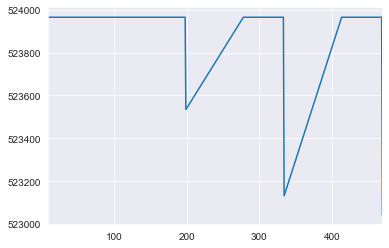

In [382]:
df[df['name'] == 'Thurston']['currenthps'].plot()

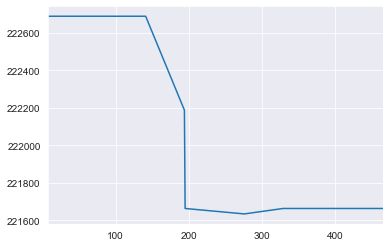

In [383]:
df[df['name'] == 'Una']['currenthps'].plot()

In [388]:
# make a dataframe that only has entries from names in the movers array
df10 = df[df['name'].isin(movers)]

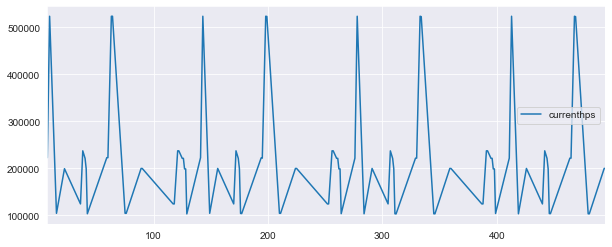

In [389]:
df10['currenthps'].plot(legend=True, figsize=(10,4))

In [392]:
df10.index = df10.dateStamp

In [395]:
del df10['_id']

In [396]:
df10

,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,currentmana,...,maxmana,maxmoves,name,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time,dateStamp
dateStamp,,,,,,,,,,,,,,,,,,,,,
2019-08-10 11:54:05,1,4000000,1,54,40,40,45,212,222688,8842,...,10078,582,Una,1,6109,1,1,1,1565438045,2019-08-10 11:54:05
2019-08-10 11:54:09,1,2000000001,1,72,40,40,45,40,523965,1262,...,10532,672,Thurston,1,6105,1,1,1,1565438049,2019-08-10 11:54:09
2019-08-10 11:54:09,1,0,1,107,40,40,68,99,104142,7589,...,10184,611,Mary,1,6109,1,1,1,1565438049,2019-08-10 11:54:09
2019-08-10 11:54:05,1,4000000,1,85,40,65,45,178,199224,8747,...,10083,539,Olive,1,6109,1,1,1,1565438045,2019-08-10 11:54:05
2019-08-10 11:54:05,1,4000000,1,74,40,40,45,217,124176,8960,...,10005,552,Zilla,1,6109,1,1,1,1565438045,2019-08-10 11:54:05
2019-08-10 11:54:05,1,4000000,1,40,40,58,45,189,237283,8443,...,10021,547,Kate,1,6109,1,1,1,1565438045,2019-08-10 11:54:05
2019-08-10 11:54:05,1,4000000,1,40,40,40,45,205,221299,8696,...,10138,537,Winnie,1,6109,1,1,1,1565438045,2019-08-10 11:54:05
2019-08-10 11:54:09,1,0,1,58,40,40,45,187,198900,10533,...,10533,534,Kim,1,6105,1,1,1,1565438049,2019-08-10 11:54:09
2019-08-10 11:45:28,1,44,1,1,77,158,40,62,103240,9131,...,10083,611,Alice,1,2311,1,1,1,1565437528,2019-08-10 11:45:28


In [398]:
df.columns

Index(['armor_on', 'bank', 'clarity_on', 'current_con', 'current_dex',
       'current_int', 'current_str', 'current_wis', 'currenthps',
       'currentmana', 'experience', 'gold', 'harm_multiplier',
       'infravision_on', 'kick_multiplier', 'kick_timer', 'kickbonus',
       'mainmob', 'maxhps', 'maxmana', 'maxmoves', 'name', 'regeneration_on',
       'room', 'sanctuary_on', 'senselife_on', 'strength_on', 'time',
       'dateStamp'],
      dtype='object')

In [399]:
list(df.columns.values)

['armor_on',
 'bank',
 'clarity_on',
 'current_con',
 'current_dex',
 'current_int',
 'current_str',
 'current_wis',
 'currenthps',
 'currentmana',
 'experience',
 'gold',
 'harm_multiplier',
 'infravision_on',
 'kick_multiplier',
 'kick_timer',
 'kickbonus',
 'mainmob',
 'maxhps',
 'maxmana',
 'maxmoves',
 'name',
 'regeneration_on',
 'room',
 'sanctuary_on',
 'senselife_on',
 'strength_on',
 'time',
 'dateStamp']

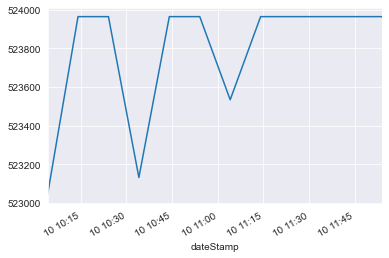

In [412]:
df10[df10['name'] == 'Thurston']['currenthps'].plot()

In [413]:
df10[df10['name'] == 'Thurston']['currenthps'].std()

348.28158235264266

In [414]:
df10[df10['name'] == 'Thurston']['currenthps'].mean()

523782.6666666667

In [416]:
df10[df10['name'] == 'Thurston']['currenthps'].mode()[0]

523965

In [417]:
df10[df10['name'] == 'Thurston']['currenthps'].min()

523042

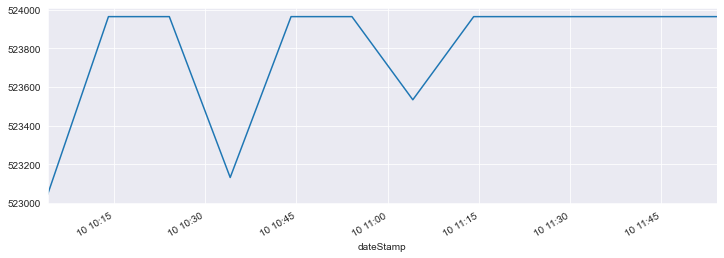

In [443]:
df10[df10['name'] == 'Thurston']['currenthps'].plot(figsize=(12,4),label='Thurston')

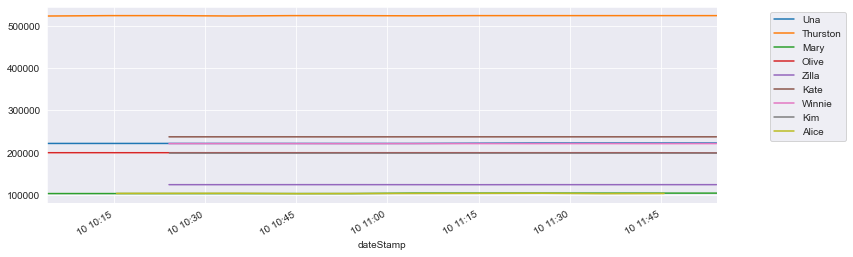

In [460]:
for m in movers:
    df10[df10['name'] == m]['currenthps'].plot(figsize=(12,4),label=m)
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))



In [421]:
pd.set_option('display.max_colwidth', -1)

In [425]:
df10['currenthps'].describe(include='all')

count    98.000000    
mean     218761.846939
std      124773.145844
min      102865.000000
25%      124135.250000
50%      199724.000000
75%      222688.000000
max      523965.000000
Name: currenthps, dtype: float64

In [426]:
df10[df10['name'] == 'Thurston']['currenthps'].describe(include='all')

count    12.000000    
mean     523782.666667
std      348.281582   
min      523042.000000
25%      523857.250000
50%      523965.000000
75%      523965.000000
max      523965.000000
Name: currenthps, dtype: float64

In [427]:
df.describe()

,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,currentmana,...,kickbonus,maxhps,maxmana,maxmoves,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time
count,500.00000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.0,500.0,5.000000e+02
mean,1.04000,9.335858e+07,1.180000,60.976000,45.072000,57.404000,45.572000,171.548000,192696.326000,9456.420000,...,3.692000,192714.876000,10161.18400,586.804000,1.280000,5960.296000,1.04000,1.0,1.0,1.565435e+09
std,0.28028,3.348343e+08,1.261262,30.903811,20.466376,43.142407,4.953169,56.364613,69905.127274,1860.813334,...,2.033077,69914.592063,396.31703,59.036533,1.961963,706.030627,0.28028,0.0,0.0,1.963069e+03
min,1.00000,0.000000e+00,1.000000,1.000000,40.000000,23.000000,40.000000,40.000000,90412.000000,857.000000,...,3.000000,90412.000000,8296.00000,509.000000,1.000000,2311.000000,1.00000,1.0,1.0,1.565431e+09
25%,1.00000,0.000000e+00,1.000000,40.000000,40.000000,40.000000,45.000000,164.000000,156370.000000,9493.500000,...,3.000000,156370.000000,10047.00000,543.000000,1.000000,6105.000000,1.00000,1.0,1.0,1.565433e+09
50%,1.00000,4.000000e+06,1.000000,59.500000,40.000000,40.000000,45.000000,186.000000,198770.500000,10038.000000,...,3.000000,198900.000000,10081.00000,554.000000,1.000000,6109.000000,1.00000,1.0,1.0,1.565435e+09
75%,1.00000,4.000000e+06,1.000000,75.000000,40.000000,52.000000,45.000000,207.000000,221299.000000,10095.000000,...,3.000000,221299.000000,10209.00000,632.000000,1.000000,6109.000000,1.00000,1.0,1.0,1.565437e+09
max,3.00000,2.000000e+09,10.000000,137.000000,169.000000,213.000000,68.000000,244.000000,523965.000000,11548.000000,...,10.000000,523965.000000,11548.00000,738.000000,15.000000,6123.000000,3.00000,1.0,1.0,1.565438e+09


In [428]:
df.columns

Index(['armor_on', 'bank', 'clarity_on', 'current_con', 'current_dex',
       'current_int', 'current_str', 'current_wis', 'currenthps',
       'currentmana', 'experience', 'gold', 'harm_multiplier',
       'infravision_on', 'kick_multiplier', 'kick_timer', 'kickbonus',
       'mainmob', 'maxhps', 'maxmana', 'maxmoves', 'name', 'regeneration_on',
       'room', 'sanctuary_on', 'senselife_on', 'strength_on', 'time',
       'dateStamp'],
      dtype='object')

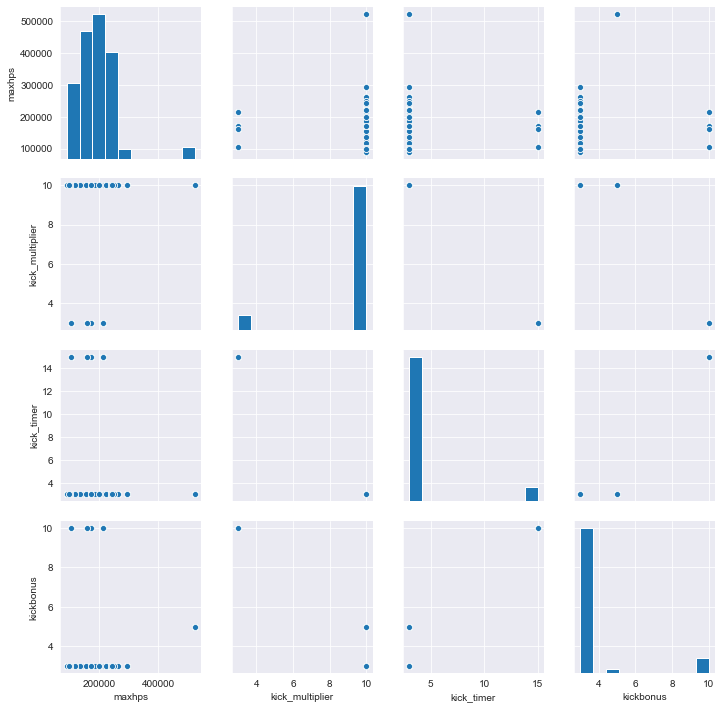

In [432]:
sns.pairplot(df[['maxhps','kick_multiplier', 'kick_timer', 'kickbonus']])

In [479]:
df[df['name'] == 'Thurston'][['experience','dateStamp']].sort_values(by='dateStamp')

,experience,dateStamp
469,307626302,2019-08-10 10:04:09
468,307681432,2019-08-10 10:14:09
413,307786007,2019-08-10 10:24:09
334,307856664,2019-08-10 10:34:09
333,307920318,2019-08-10 10:44:09
278,308012085,2019-08-10 10:54:09
199,308098044,2019-08-10 11:04:09
198,308126428,2019-08-10 11:14:09
143,308225152,2019-08-10 11:24:09
64,308299894,2019-08-10 11:34:09


In [482]:
delta = df[df['name'] == 'Thurston'][['experience','dateStamp']].max() - df[df['name'] == 'Thurston'][['experience','dateStamp']].min()

In [485]:
delta[0]

45314788

In [486]:
"{:,}".format(delta[0])

'45,314,788'

In [498]:
def markers(num):
    return num.format(num)


In [496]:
df[df['name'] == 'Thurston'][['experience','dateStamp']]

,experience,dateStamp
9,352941090,2019-08-10 11:54:09
63,352848133,2019-08-10 11:44:09
64,308299894,2019-08-10 11:34:09
143,308225152,2019-08-10 11:24:09
198,308126428,2019-08-10 11:14:09
199,308098044,2019-08-10 11:04:09
278,308012085,2019-08-10 10:54:09
333,307920318,2019-08-10 10:44:09
334,307856664,2019-08-10 10:34:09
413,307786007,2019-08-10 10:24:09


In [504]:
df[df['name'] == 'Thurston'][['experience']]

,experience
9,352941090
63,352848133
64,308299894
143,308225152
198,308126428
199,308098044
278,308012085
333,307920318
334,307856664
413,307786007


#### reordering the columns

In [505]:
df.columns.values

array(['armor_on', 'bank', 'clarity_on', 'current_con', 'current_dex',
       'current_int', 'current_str', 'current_wis', 'currenthps',
       'currentmana', 'experience', 'gold', 'harm_multiplier',
       'infravision_on', 'kick_multiplier', 'kick_timer', 'kickbonus',
       'mainmob', 'maxhps', 'maxmana', 'maxmoves', 'name',
       'regeneration_on', 'room', 'sanctuary_on', 'senselife_on',
       'strength_on', 'time', 'dateStamp'], dtype=object)

In [506]:
neworder = ['dateStamp', 'name','maxhps', 'maxmana', 'maxmoves',
        'current_con', 'current_dex','current_int', 'current_str', 'current_wis', 'currenthps',
       'currentmana', 'experience', 'gold', 'bank',
      'harm_multiplier','kick_multiplier', 'kick_timer', 'kickbonus',
       'mainmob', 'armor_on', 'clarity_on',  
       'infravision_on','sanctuary_on', 'senselife_on',
       'strength_on','regeneration_on', 'room',  'time' ]

In [507]:
df[neworder]

,dateStamp,name,maxhps,maxmana,maxmoves,current_con,current_dex,current_int,current_str,current_wis,...,mainmob,armor_on,clarity_on,infravision_on,sanctuary_on,senselife_on,strength_on,regeneration_on,room,time
0,2019-08-10 11:54:05,Ida,212889,10075,543,79,40,52,45,183,...,tree2,1,1,1,1,1,1,1,6105,1565438045
1,2019-08-10 11:54:09,Clem,155361,10048,670,40,40,52,45,201,...,tree4,1,1,1,1,1,1,1,6123,1565438049
2,2019-08-10 11:54:05,Quinton,172432,10009,565,1,169,176,40,40,...,tree2,1,1,3,1,1,1,1,6105,1565438045
3,2019-08-10 11:54:09,Bert,221582,10395,654,40,40,40,45,213,...,tree2,1,1,1,1,1,1,1,6105,1565438049
4,2019-08-10 11:54:09,Lee,111038,10024,652,60,40,45,44,117,...,tree1,1,1,1,1,1,1,1,6109,1565438049
5,2019-08-10 11:54:09,Paul,156370,10659,727,59,59,40,43,164,...,tree2,1,1,1,1,1,1,1,6105,1565438049
6,2019-08-10 11:54:05,Titas,177784,10059,527,75,40,47,45,197,...,tree2,1,1,1,1,1,1,1,6105,1565438045
7,2019-08-10 11:54:05,Una,222688,10078,582,54,40,40,45,212,...,tree1,1,1,1,1,1,1,1,6109,1565438045
8,2019-08-10 11:54:09,Marioche,90412,11089,642,96,40,40,45,222,...,tree4,1,1,1,1,1,1,1,6123,1565438049
9,2019-08-10 11:54:09,Thurston,523965,10532,672,72,40,40,45,40,...,tree2,1,1,1,1,1,1,1,6105,1565438049
